### Import Libraries

In [134]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

%matplotlib inline

In [2]:
 nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Import Dataset

In [4]:
data=pd.read_excel("Canva_reviews.xlsx")

## Exploratory Data Analysis

In [5]:
data.head(3)

,reviewId,userName,userImage,review,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Sentiment,Sub Category,Sub Category_test
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32,Negative,NaN,bug_picture_quality
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-...,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Hey! Yes I gave a 5 star rating... coz I belie...,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaT,Positive,extremely_happy,NaN
2,gp:AOqpTOE86hSyPRHZgYt28Uk5zGe4FZGb1hkmtFDiYJ2...,Theknown _unknown,https://play-lh.googleusercontent.com/a-/AOh14...,Canva used to be a good app! But recently I've...,1,160,2.116.0,2021-06-23 19:13:28,Hi there. We're sorry to hear that you are hav...,2021-06-26 20:20:56,Negative,saving_downloading_issue,bug_saving_files


#### Checking Random Reviews

In [6]:
data.loc[13,'review']

'Unable to save my work. Nothing works :('

In [7]:
data.loc[13,'Sentiment']

'Negative'

### Bar Plot of Sentiment

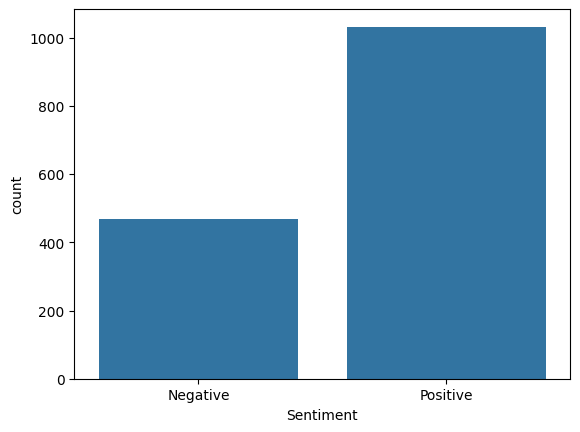

In [8]:
sns.countplot(x="Sentiment", data=data)
plt.show()

In [9]:
data['Sentiment'].value_counts()

,count
Sentiment,
Positive,1032
Negative,468


In [10]:
468/(1032+468)

0.312

### Bar Plot of 'score'

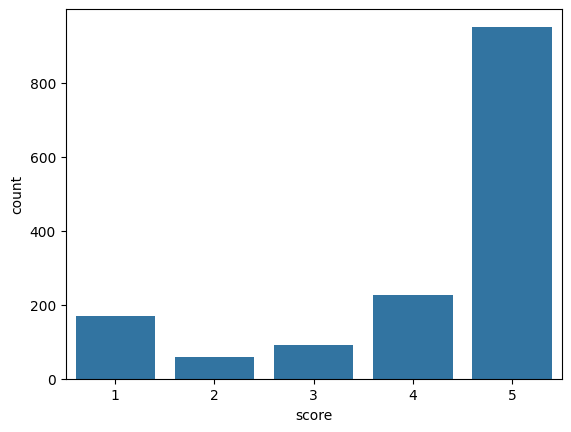

In [11]:
sns.countplot(x="score", data=data)
plt.show()

### Check relationship between 'score' and 'Sentiment'

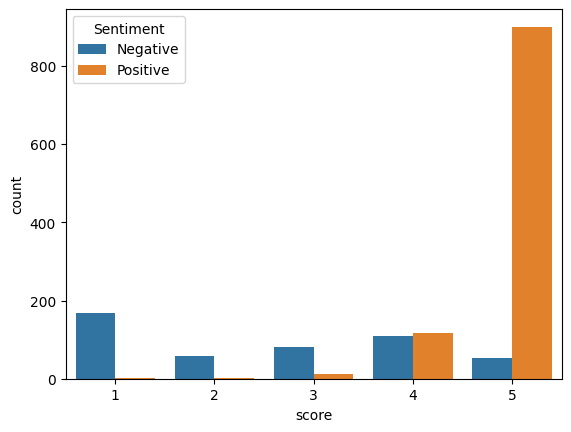

In [12]:
sns.countplot(x="score", data=data, hue="Sentiment")
plt.show()

Where ratings is low sentiment is negative and very less/no positive reviews which is obvious

### Find the length of each 'review'

In [13]:
data["len"]=data["review"].apply(len)

In [14]:
data["len"].describe()

,len
count,1500.000000
mean,86.468667
std,55.681355
min,20.000000
25%,54.000000
50%,75.000000
75%,102.000000
max,498.000000


### Plot histogram of "len"

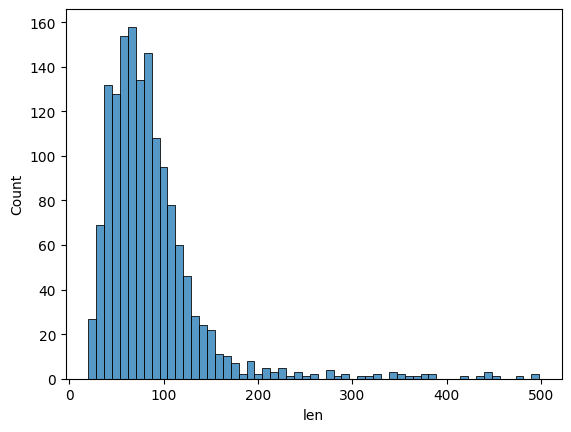

In [15]:
sns.histplot(data=data, x="len")
plt.show()

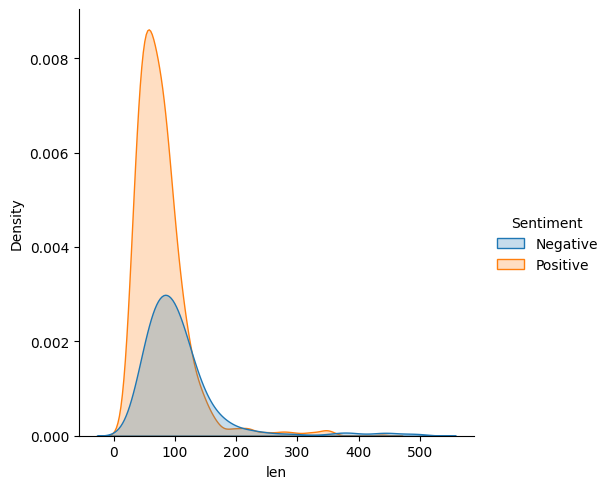

In [16]:
sns.displot(data=data,x="len",hue="Sentiment", kind="kde", fill=True)
plt.show()

We see that there isn't any much difference between length of reviews for negative and positive sentiments
Average negative sentiment is slighlty towards right but that's not very significant. Positive sentiment has peak it is because it has more reviews.

## Tokenization

In [17]:
data=data[["review", "Sentiment"]]

In [18]:
data.head(3)

,review,Sentiment
0,Overall it's really an amazing app. I've been ...,Negative
1,Hey! Yes I gave a 5 star rating... coz I belie...,Positive
2,Canva used to be a good app! But recently I've...,Negative


In [19]:
data.loc[13,"review"]

'Unable to save my work. Nothing works :('

In [20]:
sent_tokenize(data.loc[13,"review"])

['Unable to save my work.', 'Nothing works :(']

In [21]:
data.loc[1495,"review"]


'Absolutely amazing and a lifesaver for teachers.'

In [22]:
sent_tokenize(data.loc[1495,"review"])


['Absolutely amazing and a lifesaver for teachers.']

### Convert text to lower case

In [23]:
reviews=list(data["review"])

In [24]:
len(reviews)

1500

In [25]:
reviews[13]

'Unable to save my work. Nothing works :('

In [26]:
reviews[13].lower()

'unable to save my work. nothing works :('

Apply lower to all records

In [27]:
reviews_lower=[r.lower() for r in reviews]

In [28]:
reviews_lower[13]

'unable to save my work. nothing works :('

In [29]:
tokens=[word_tokenize(r) for r in reviews_lower]

In [30]:
tokens[13]

['unable', 'to', 'save', 'my', 'work', '.', 'nothing', 'works', ':', '(']

using word tokenizer we get list of tokens

In [31]:
len(tokens)

1500

### Stop Words Removal

In [32]:
# nltk has corpus for stop words we'll use that corpus

sw=stopwords.words("english")

In [33]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [35]:
token_without_sw=[[word for word in t if word not in sw] for t in tokens]

In [36]:
tokens[13]

['unable', 'to', 'save', 'my', 'work', '.', 'nothing', 'works', ':', '(']

In [37]:
token_without_sw

[['overall',
  "'s",
  'really',
  'amazing',
  'app',
  '.',
  "'ve",
  'using',
  'past',
  '5',
  'years',
  'however',
  'one',
  'issue',
  'though',
  'wanted',
  'get',
  'address',
  'since',
  'think',
  'issue',
  'lasted',
  'many',
  'years',
  '?',
  'texts',
  'blurred',
  'zoom',
  "'s",
  'pixelated',
  '.',
  'thought',
  'issue',
  'occurs',
  'mobile',
  'apps',
  'however',
  'also',
  'present',
  'website',
  '.',
  'please',
  'fix',
  '.',
  'still',
  'remember',
  'time',
  'export',
  'high',
  'definition',
  'texts',
  'love',
  'experience',
  '.',
  'thank',
  '!'],
 ['hey',
  '!',
  'yes',
  'gave',
  '5',
  'star',
  'rating',
  '...',
  'coz',
  'believe',
  'deserves',
  '!',
  'mostly',
  'use',
  'desktop',
  'version',
  'seriously',
  'satisfied',
  'app',
  'android',
  'desktop',
  'version',
  '.',
  'came',
  'thank',
  'developers',
  'beautiful',
  'app',
  'facilities',
  '.',
  'literally',
  'find',
  'almost',
  'everything',
  'need',
 

### Remove Punctuation marks

In [38]:
tokenizer=RegexpTokenizer(r'\w+')
# removes everything except words


In [39]:
tokenizer.tokenize("wasn't")

['wasn', 't']

In [40]:
t=tokenizer.tokenize("wasn't")

In [41]:
"".join(t)

'wasnt'

In [42]:
tokenizer.tokenize(":")

[]

In [43]:
tokens=[["".join(tokenizer.tokenize(word)) for word in t if len(tokenizer.tokenize(word))>0] for t in token_without_sw]

### Stemming

We do stemmming to get root word. Teachers and teach mean same but for model they appear as two different word. Hence we get unique words (root words) for all words

In [44]:
porter=PorterStemmer()
lancaster=LancasterStemmer()

In [45]:
porter.stem("teachers")

'teacher'

In [46]:
lancaster.stem("teachers") #more accurate

'teach'

In [47]:
porter.stem("absolutely")

'absolut'

In [49]:
lancaster.stem("absolutely")

'absolv'

In [50]:
tokens=[[porter.stem(word) for word in t] for t in tokens]

In [51]:
tokens[13]

['unabl', 'save', 'work', 'noth', 'work']

### Word Count Distribution

We need to find total number of unique tokens so first I need to flatten the list

In [52]:
flat_tokens=[word for t in tokens for word in t]
#basically in each tokenthere are list of words now we want to create one list with all the tokenes present
# so we flatten out for t in tokens (say 100 tokens)  and for word in each token t we just keep word


In [53]:
len(flat_tokens)

13782

In [54]:
flat_tokens[:10]

['overal', 's', 'realli', 'amaz', 'app', 've', 'use', 'past', '5', 'year']

In [56]:
counts=Counter(flat_tokens)


In [57]:
len(counts)

1720

In [58]:
counts.most_common(10)

[('app', 932),
 ('use', 474),
 ('design', 349),
 ('easi', 293),
 ('s', 240),
 ('love', 220),
 ('good', 219),
 ('edit', 191),
 ('make', 190),
 ('great', 184)]

## Bag of Words

In [59]:
tokens[13]

['unabl', 'save', 'work', 'noth', 'work']

In [60]:
" ".join(tokens[13])

'unabl save work noth work'

In [61]:
clean_reviews=[" ".join(t) for t in tokens]


In [62]:
clean_reviews[13]

'unabl save work noth work'

In [63]:
clean_reviews[1495]

'absolut amaz lifesav teacher'




```

indexes    273
sentence" unavl save work north work "


uavl= 0 0 0 ... 1 (at 272nd index as indexing in python starts from 0) 0000000
length: 1720 as 1720 unique words


```

This is binary bag of words ( as only 0 and 1)



We have CBOW as well  . what it does is if "unavl" was present n times then instead of "1" n will be there at that particular index.

---




 we'll remove rare words because they'll not help in building model. For eg we can keep a threshold we'll say if the word appears lesser
  than 5 documents we'll mark it as rare words.

In [67]:
vect=CountVectorizer(binary=True, min_df=5)

In [68]:
# now I want to apply it for all clean reviews
X=vect.fit_transform(clean_reviews)

In [69]:
X.shape  # we have 1500 reviews and we have 413 tokens that satisfy >5 threshold

(1500, 413)

#### Unique words in vocabulary

In [70]:
len(vect.vocabulary_)

413

In [71]:
type(X)

scipy.sparse._csr.csr_matrix

 Sparse matrix stores sparse data. We have 1s at very less places at rest of places we have all 0s.


#### Convert sparse matrix to array

In [72]:
X_a=X.toarray()

In [73]:
X_a[13,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [74]:
X_a[13,:].sum()

4

In [75]:
clean_reviews[13]

'unabl save work noth work'

In [80]:
vect.vocabulary_.get("unabl")
# get index for unabl

370

In [81]:
vect.vocabulary_.get("work")


401

In [82]:
X_a[13,370]

1

In [83]:
X_a[13,401]

1

In [84]:
data.head()

,review,Sentiment
0,Overall it's really an amazing app. I've been ...,Negative
1,Hey! Yes I gave a 5 star rating... coz I belie...,Positive
2,Canva used to be a good app! But recently I've...,Negative
3,"It's a brilliant app, but I have just one prob...",Negative
4,This was such a great app. I used to make BTS ...,Negative


In [86]:
data["Sentiment"]=data["Sentiment"].apply(lambda x: 1 if x=="Positive" else 0)

In [94]:
data.head()

,review,Sentiment
0,Overall it's really an amazing app. I've been ...,0
1,Hey! Yes I gave a 5 star rating... coz I belie...,1
2,Canva used to be a good app! But recently I've...,0
3,"It's a brilliant app, but I have just one prob...",0
4,This was such a great app. I used to make BTS ...,0


In [95]:
y=data["Sentiment"] #target variable

### Split the dataset into train and test

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X_a, y, test_size=0.2, random_state=42)


## Build Logistic Regression Model

In [98]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [99]:
train_pred=model.predict(X_train)

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, train_pred)

0.9608333333333333

In [102]:
accuracy_score(y_test, model.predict(X_test))

0.9133333333333333

# Save both the vectorizer and the model

Note: We need to split data into train, validation, test. What we did here is bad practice. We should check on validation data only until model is decided.

In [105]:
with open("Output/binary_count_vect.pkl","wb") as f:
  pickle.dump(vect,f)

with open("Output/binary_count_vect_lr.pkl","wb") as f:
  pickle.dump(model,f)



## Bag of Words Without Binary

In [106]:
vect=CountVectorizer(min_df=5)
X=vect.fit_transform(clean_reviews)

In [107]:
X_a=X.toarray()

In [108]:
clean_reviews[13]

'unabl save work noth work'

In [110]:
vect.vocabulary_.get("work")

401

In [111]:
X_a[13,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [112]:
X_a[13,401]

2

In [113]:
# rest everything will be same

In [114]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,stratify=y, random_state=42)

In [115]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [116]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)
print(f"Train Accuracy:{accuracy_score(y_train, train_pred)}")
print(f"Test Accuracy:{accuracy_score(y_test, test_pred)}")

Train Accuracy:0.9558333333333333
Test Accuracy:0.8833333333333333


## Ngrams

Bigrams : in addition to single words it will take two words together and will add it to vocabulary. We're increasing size of vocabulary using bigrams.

How does it helps?
eg [unable save] [save work] [noth work]

It  helps as context might give you better classification power. To consider context we need to increase number of words.

we can have as many words.. We can have n grams (generalized form)

Let's take uni, bi and trigram and see how model performs.

In [122]:
vect=CountVectorizer(min_df=5, ngram_range=(1,3))


In [123]:
X=vect.fit_transform(clean_reviews)

In [125]:
X.shape  # unique vocabulary increased

(1500, 666)

In [126]:
vect.vocabulary_

{'overal': 425,
 'realli': 476,
 'amaz': 19,
 'app': 29,
 've': 625,
 'use': 602,
 'past': 428,
 'year': 661,
 'howev': 298,
 'one': 415,
 'issu': 314,
 'though': 579,
 'want': 633,
 'get': 257,
 'sinc': 519,
 'think': 578,
 'last': 326,
 'mani': 372,
 'text': 573,
 'zoom': 665,
 'thought': 580,
 'mobil': 385,
 'also': 17,
 'present': 455,
 'websit': 638,
 'pleas': 446,
 'fix': 237,
 'still': 539,
 'time': 582,
 'export': 219,
 'high': 293,
 'definit': 155,
 'love': 350,
 'experi': 217,
 'thank': 574,
 'realli amaz': 477,
 'amaz app': 20,
 'app ve': 66,
 've use': 628,
 'pleas fix': 447,
 'gave': 255,
 'star': 537,
 'rate': 472,
 'deserv': 156,
 'desktop': 164,
 'version': 629,
 'satisfi': 499,
 'android': 23,
 'develop': 166,
 'beauti': 86,
 'liter': 335,
 'find': 231,
 'almost': 14,
 'everyth': 212,
 'need': 395,
 'best': 89,
 'even': 206,
 'without': 645,
 'premium': 453,
 'featur': 227,
 'provid': 466,
 'us': 601,
 'lot': 346,
 'gave star': 256,
 'desktop version': 165,
 'canva': 1

In [127]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,stratify=y, random_state=42)

In [128]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [129]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)
print(f"Train Accuracy:{accuracy_score(y_train, train_pred)}")
print(f"Test Accuracy:{accuracy_score(y_test, test_pred)}")

Train Accuracy:0.9708333333333333
Test Accuracy:0.8933333333333333


In [130]:
with open("Output/n_gram.pkl","wb") as f:
  pickle.dump(vect,f)

with open("Output/n_gram_lr.pkl","wb") as f:
  pickle.dump(model,f)

## Tf-Idf

Vectorization techniques so far considers all words equally. Now we'll find importance of words.
If a word appears more number of times
 in a document it is important for that document.
 This is called as Term Frequency.
 Term Frequncy(T,D) (Given a token and document)

 ```
 Term Frequency(T,D)=Number of times T occurs  in D/ Number of terms in D

 ```

 This alone is not sufficient because this word can be a common word and can appear in many documents.

 So it doesn't have any value for classifying the model. SO we need to make sure that we properly acknowledge weightage of that word for that particular documents. For this we have IDF.

 IDF is Inverse Document Frequency


 ```
 IDF(T)=log_e (No of documents/no of documents with T)
 ```


```
TF.IDF=TF*IDF
```

In [136]:
vect=TfidfVectorizer(min_df=5)


In [137]:
X=vect.fit_transform(clean_reviews)

In [138]:
X.shape

(1500, 413)

In [139]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,stratify=y, random_state=42)

In [140]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [141]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)
print(f"Train Accuracy:{accuracy_score(y_train, train_pred)}")
print(f"Test Accuracy:{accuracy_score(y_test, test_pred)}")

Train Accuracy:0.9341666666666667
Test Accuracy:0.8766666666666667


In [142]:
with open("Output/tf_idf.pkl","wb") as f:
  pickle.dump(vect,f)

with open("Output/tf_idf_lr.pkl","wb") as f:
  pickle.dump(model,f)

## Testing for new data

In [143]:
# Sample test reviews
test_review_1 = '''this is a truly amazing app , best for those who havw
content but don't know how to express it in a good and shareable manner.
Thanks Team Canva for such a great app.'''
test_review_2 = '''Its the worst app ever I save my design lts not save'''

### Load the best Model(n-gram) and it's vectorizer

In [144]:
vect=pickle.load(open("Output/n_gram.pkl","rb"))
model=pickle.load(open("Output/n_gram_lr.pkl","rb"))

### Convert the reviews to a batch of one record

In [145]:
test_review_1=[test_review_1]
test_review_2=[test_review_2]

### Convert the text to lower case

In [146]:
test_review_1=[r.lower() for r in test_review_1]
test_review_2=[r.lower() for r in test_review_2]

### Tokenize the text

In [147]:
tokens_1=[word_tokenize(r) for r in test_review_1]
tokens_2=[ word_tokenize(r) for r in test_review_2]

In [149]:
tokens_1

[['this',
  'is',
  'a',
  'truly',
  'amazing',
  'app',
  ',',
  'best',
  'for',
  'those',
  'who',
  'havw',
  'content',
  'but',
  'do',
  "n't",
  'know',
  'how',
  'to',
  'express',
  'it',
  'in',
  'a',
  'good',
  'and',
  'shareable',
  'manner',
  '.',
  'thanks',
  'team',
  'canva',
  'for',
  'such',
  'a',
  'great',
  'app',
  '.']]

### Remove stopwords

In [150]:
tokens_1=[[word for word in t if word not in sw] for t in tokens_1]
tokens_2= [[word for word in t if word not in sw] for t in tokens_2]

### Remove punctuations

In [151]:
tokens_1=[["".join(tokenizer.tokenize(word)) for word in t if len(tokenizer.tokenize(word))>0] for t in tokens_1]
tokens_2=[["".join(tokenizer.tokenize(word)) for word in t if len(tokenizer.tokenize(word))>0] for t in tokens_2]

### Stemming

In [152]:
tokens_1=[[porter.stem(word) for word in t] for t in tokens_1]
tokens_2=[[porter.stem(word) for word in t] for t in tokens_2]

### Join the tokens to form a sentence

In [153]:
clean_review_1=[" ".join(review) for review in tokens_1]
clean_review_2=[" ".join(review) for review in tokens_2]

### Tranform the text using vectorizer and make predictions

In [154]:
X_test=vect.transform(clean_review_1)

In [155]:
X_test.shape

(1, 666)

In [156]:
model.predict_proba(X_test)


array([[0.00443387, 0.99556613]])

In [157]:
model.predict(X_test)

array([1])

#### Note: Prediction probability for positive class is high for the first test review

In [158]:
X_test=vect.transform(clean_review_2)

In [159]:
X_test.shape

(1, 666)

In [160]:
model.predict_proba(X_test)


array([[0.87712216, 0.12287784]])

#### Note: Prediction probability for negative class is high for the second test review

In [161]:
model.predict(X_test)

array([0])